Converged in 6 epochs.
Final weights: [ 0.24076743 -0.13249242 -0.04602911]


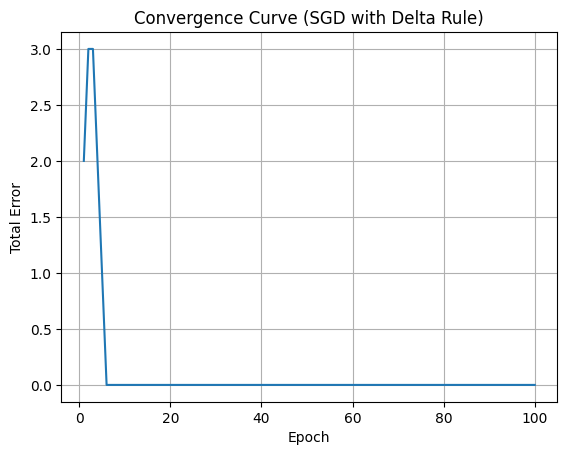

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Input and target values
Xinput = np.array([[0, 0, 1],  # Bias included in the third column
                   [0, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

Dtarget = np.array([0, 0, 1, 1])  # Target output

# Initialize weights randomly
weights = np.random.randn(3)
learning_rate = 0.1
epochs = 100

# Activation function (Step function)
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Training using SGD and Delta learning rule
convergence_curve = []
converged=False

for epoch in range(epochs):
    total_error = 0
    
    # Shuffle the data for each epoch (stochastic gradient descent)
    indices = np.random.permutation(len(Xinput))
    Xinput_shuffled = Xinput[indices]
    Dtarget_shuffled = Dtarget[indices]
    
    for i in range(len(Xinput)):
        x = Xinput_shuffled[i]
        d = Dtarget_shuffled[i]
        
        # Forward pass (calculate output)
        y = step_function(np.dot(x, weights))
        
        # Calculate error
        error = d - y
        total_error += abs(error)
        
        # Delta rule: weight update
        weights += learning_rate * error * x
    
    convergence_curve.append(total_error)
    
    # Stop early if there is no error
    if total_error == 0 and converged==False:
        print(f"Converged in {epoch + 1} epochs.")
        converged=True

# Print final weights
print("Final weights:", weights)

# Plot convergence curve
plt.plot(range(1, len(convergence_curve) + 1), convergence_curve)
plt.xlabel('Epoch')
plt.ylabel('Total Error')
plt.title('Convergence Curve (SGD with Delta Rule)')
plt.grid()
plt.show()